<a href="https://colab.research.google.com/github/Shreyuu19/Stock-Predictions-/blob/main/Stock_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
import yfinance as yf
df = yf.download('AAPL', start = '2018-01-01', end = '2018-12-31')
df.to_csv('AAPL.csv')

/tmp/ipython-input-336243748.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start = '2018-01-01', end = '2018-12-31')
[*********************100%***********************]  1 of 1 completed


In [ ]:
df.shape

(250, 5)

In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.380997,40.390375,39.677740,39.888719,102223600
2018-01-03,40.373966,40.917820,40.310676,40.444293,118071600
2018-01-04,40.561493,40.664638,40.338796,40.446626,89738400
2018-01-05,41.023312,41.110045,40.566195,40.657619,94640000
2018-01-08,40.870926,41.166292,40.772467,40.870926,82271200


In [ ]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-12-21,35.864433,37.632316,35.602703,37.322996,382978400
2018-12-24,34.936470,36.059539,34.879364,35.250547,148676800
2018-12-26,37.396755,37.411031,34.910301,35.286244,234330000
2018-12-27,37.154049,37.301573,35.707388,37.080289,212468400
2018-12-28,37.173088,37.717969,36.773354,37.475271,169165600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-01-02 to 2018-12-28
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   250 non-null    float64
 1   (High, AAPL)    250 non-null    float64
 2   (Low, AAPL)     250 non-null    float64
 3   (Open, AAPL)    250 non-null    float64
 4   (Volume, AAPL)  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,44.710608,45.169868,44.267868,44.723854,1.360645e+08
std,4.957824,4.959986,4.918938,4.940699,5.862059e+07
min,34.936470,36.059539,34.879364,35.250547,5.005560e+07
25%,40.844554,41.172359,40.550696,40.868941,9.407860e+07
50%,44.037106,44.253303,43.669686,43.996938,1.264696e+08
75%,49.204668,49.550749,48.817707,49.162171,1.631112e+08
max,55.026340,55.358294,54.483354,54.720475,3.849868e+08


In [ ]:
print(df.columns)

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [ ]:
df.isnull().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


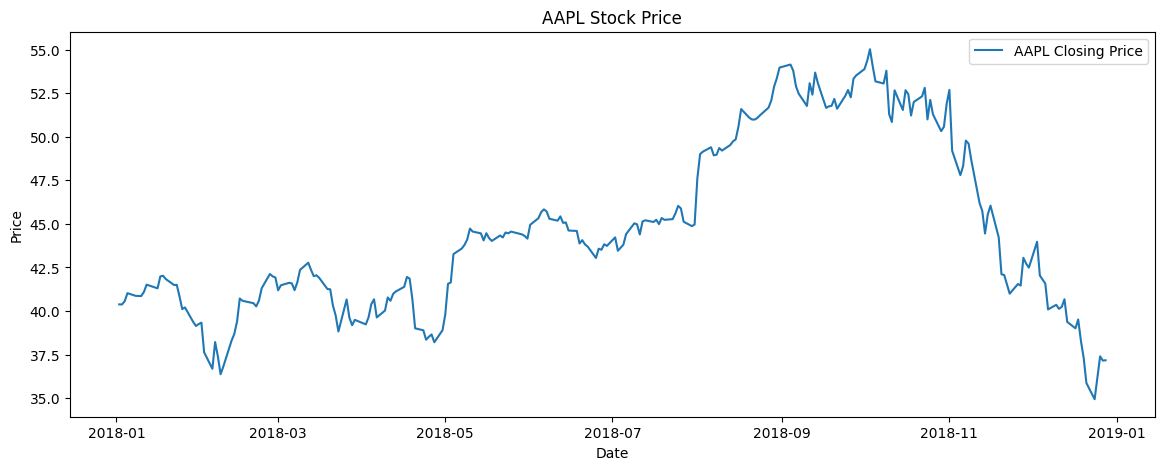

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label='AAPL Closing Price')
plt.title("AAPL Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [ ]:
# Use only the closing price
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_data, time_step)

# Reshape to (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
# Use only the closing price
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_data, time_step)

# Reshape to (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Prediction of next closing price

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.2599
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0311
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0295
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0190
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0161
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0137
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0135
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0123
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0103
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0088


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


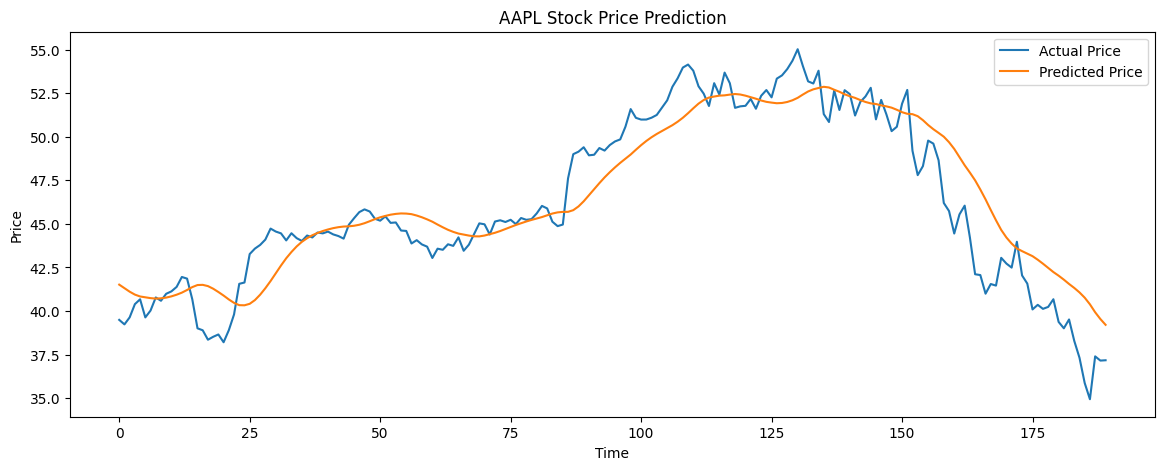

In [ ]:
# Predict on training data (just for visualization)
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)
original_data = scaler.inverse_transform(scaled_data[time_step:])

# Plot actual vs predicted
plt.figure(figsize=(14, 5))
plt.plot(original_data, label='Actual Price')
plt.plot(train_predict, label='Predicted Price')
plt.title("AAPL Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [ ]:
# Get last 60 days data
last_60_days = scaled_data[-60:].reshape(1, 60, 1)

# Predict next day
next_day_price = model.predict(last_60_days)
next_day_price_actual = scaler.inverse_transform(next_day_price)

print(f"Predicted next day AAPL price: ${next_day_price_actual[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted next day AAPL price: $38.93
